In [1]:
import numpy as np
import matplotlib as plt
import plotly as plx
import methods
import matrix_tools as mt
import pandas as pd
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
from functools import partial


# Making Random Matrices

In [2]:
size=100
sparsity=1e-4
scale=1e+2

In [3]:
matrices={
    'random_sparse':mt.random_sparse(size,sparsity=sparsity),
    'symetric_sparse':mt.symmetric_sparse(size,sparsity=sparsity),
    'diagonal_dominant':mt.digaonal_dominant(size,sparsity=sparsity),
    'diagonal_non_tda':mt.diag_non_tda(size,sparsity=sparsity),   
    'diagonal_clustered':mt.diagonal_clustered(size),
    'diagonal_well_seperated':mt.digaonal_well_seperated(size), 
          }

## Saving Matrices

In [24]:
import pickle
with open('matrices','wb') as f:
    pickle.dump(matrices,f)
    

# Plot results Function

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline
def plot_results(df_dict,mode='real_diff',maxiter=100,cols=2,):

    if(len(matrices)==1):
        cols=1
        rows=1
    else:
        rows=int(np.ceil(len(matrices)/cols))
    fig, ax = plt.subplots(nrows=rows, ncols=cols,figsize=(20,int(10*rows/cols)) )

    iter=0
    for matrix_name, df_result in df_dict.items():
        i=iter//cols
        j=iter%cols

        for method_name,result in df_result.iterrows():
            if(method_name=='numpy.eig' and mode!='approx_eigens'):continue
            if len(matrices)==1:
                ax.semilogy(result[mode],label=method_name)       
                ax.set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax.set_ylabel('Eigenvalue')
                else:
                    ax.set_ylabel('Error')
                ax.set_xlim(0,20)
                ax.legend(loc='best',fontsize='10')
                ax.set_title(matrix_name)
            elif(rows==1):

                ax[j].semilogy(result[mode],label=method_name)
                ax[j].set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax[j].set_ylabel('Eigenvalue')
                else:
                    ax[j].set_ylabel('Error')
                ax[j].set_xlim(0,20)
                ax[j].legend(loc='best',fontsize='10')
                ax[j].set_title(matrix_name)
                
            else:
                if(mode=='approx_eigens'):
                    ax[i,j].scatter(x=result[mode].real,y=result[mode].imag,s=range(1,len(result[mode])+1),label=method_name)
                else:

                    ax[i,j].semilogy(result[mode],label=method_name)
                ax[i,j].set_xlabel('Number of iterations')
                if(mode=='approx_eigens'):ax[i,j].set_ylabel('Eigenvalue')
                else:
                    ax[i,j].set_ylabel('Error')
                ax[i,j].set_xlim(0,maxiter)
                ax[i,j].legend(loc='best',fontsize='10')
                ax[i,j].set_title(matrix_name)
        iter+=1
                
    if(mode=='real_diff'):
        suptitle='Real Residuals Plot (Diffrence Between Approxiamtion Value at each iteration and the numpy.eig actaul Value)'
    elif mode=='residuals':
        suptitle='Residuals Plot (Value used to check convergence at each iteration (not at the same scale for each method))'
    elif(mode=='approx_eigens'):
        suptitle='Eigenvalue Aprroxiamtion Plot'


         
    fig.suptitle(suptitle)
    fig.set_tight_layout(tight=True)
    plt.show()
    return fig




# Smallest Eigenvalue

In [6]:
tol=1e-20
maxiter=100

## Defining Methods

In [7]:
methods_list_without_eigens_history={
    'numpy.eig':partial(methods.numpy_eigen,l=0,u=1),
    'inverse_iteration_use_inverse_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    'inverse_iteration_use_inverse_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    'inverse_iteration_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol),
    'inverse_iteration_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'simple_rq':methods.rayleigh_quotient_iteration(maxiter=maxiter,tol=tol),
    # 'davidson_1':methods.davidson_1,
    # 'davidson_2':methods.davidson_2,
    # 'davidson_3':methods.davidson_3,
    'davidson_4':partial(methods.davidson_4,maxiter=maxiter,tol=tol),
    'davidson_4_jacobi':partial(methods.davidson_4,jacobi=True,maxiter=maxiter,tol=tol),
    # 'davidson_4_hamiltonian':partial(methods.davidson_4,hamiltonian=True, maxiter=maxiter),
    'davidson_4_nonhermitian':partial(methods.davidson_4,non_hermitian=True,maxiter=maxiter,tol=tol),
         }

smallest_methods_list={
    'numpy.eig':partial(methods.numpy_eigen,l=0,u=1),
    'inverse_iteration_use_inverse_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'inverse_iteration_use_inverse_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'inverse_iteration_use_inverse_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'inverse_iteration_use_inverse_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=True,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'inverse_iteration_rq_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'inverse_iteration_rq_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'inverse_iteration_norm(2)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='2',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'inverse_iteration_norm(max_abs)':partial(methods.power_iteration,calc_min=True,use_inverse=False,norm_c_mode='max_abs',use_rayleigh=False,maxiter=maxiter,tol=tol),
    # 'simple_rq':methods.rayleigh_quotient_iteration(maxiter=maxiter,tol=tol),
    # 'davidson_1':methods.davidson_1,
    # 'davidson_2':methods.davidson_2,
    # 'davidson_3':methods.davidson_3,
    'davidson_4':partial(methods.davidson_4,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    'davidson_4_jacobi':partial(methods.davidson_4,jacobi=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'davidson_4_hamiltonian':partial(methods.davidson_4,hamiltonian=True, maxiter=maxiter),
    'davidson_4_nonhermitian':partial(methods.davidson_4,non_hermitian=True,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
         }


## Running Methods

In [8]:
smallest_results={}
for matrix_name, matrix in matrices.items():
    matrix_results={} 
    for name, method in smallest_methods_list.items():
         eigen_value,eigen_vector,duration,iteration,residuals,approx_eigens=method(matrix)
         matrix_results[name]={'eigen_value':eigen_value, 'eigen_vector':eigen_vector,'duration':duration,'iteration':iteration, 'residuals':residuals,'approx_eigens':approx_eigens }
    smallest_results[matrix_name]=matrix_results


2024-01-30 05:19:21.809 | SUCCESS  | methods:numpy_eigen:758 - numpy = [-263.8122437-107.10180516j]; time = 0.0191342830657959 seconds
2024-01-30 05:19:22.512 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = True, norm_c_mode = 2 = -7.699155315497899; time = 0.7002072334289551 seconds.
2024-01-30 05:19:23.240 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = True, norm_c_mode = max_abs = -7.699155315497876; time = 0.711359977722168 seconds.
2024-01-30 05:19:23.318 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 72
2024-01-30 05:19:23.319 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = False, norm_c_mode = 2 = -7.699155315498651; time = 0.06305074691772461 seconds.
2024-01-30 05:19:23.377 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 60
2024-01-30 05:19:23.37

c:\Users\HP OMEN\Desktop\Eigenvalue-Problem\methods.py:341: LinAlgWarning: Ill-conditioned matrix (rcond=1.01476e-16): result may not be accurate.
  C=la.solve(A_Sigma-rcoeff*np.eye(n),B)


2024-01-30 05:19:33.895 | SUCCESS  | methods:davidson_4:737 - Davidson_4 = [13.64049836]; time = 0.7231671810150146 seconds.
2024-01-30 05:19:36.108 | SUCCESS  | methods:davidson_4:737 - Davidson_4 = [13.64049836]; time = 2.211991786956787 seconds.
2024-01-30 05:19:36.802 | SUCCESS  | methods:davidson_4:737 - Davidson_4 = [13.64049836]; time = 0.6915247440338135 seconds.
2024-01-30 05:19:36.877 | SUCCESS  | methods:numpy_eigen:758 - numpy = [-988.90840971]; time = 0.07403159141540527 seconds
2024-01-30 05:19:38.983 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 70
2024-01-30 05:19:38.984 | SUCCESS  | methods:power_iteration:418 - Inverse iteration: use_inverse = True, use_rayleigh = True, norm_c_mode = 2 = 2.2411412466702063; time = 2.1047616004943848 seconds.
2024-01-30 05:19:41.292 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 68
2024-01-30 05:19:41.294 | SUCCESS  | methods:power_iteration:418 - 

c:\Users\HP OMEN\Desktop\Eigenvalue-Problem\methods.py:347: LinAlgWarning: Diagonal number 14 is exactly zero. Singular matrix.
  LU, piv = la.lu_factor(A_Sigma-rcoeff*np.eye(n))
c:\Users\HP OMEN\Desktop\Eigenvalue-Problem\methods.py:347: LinAlgWarning: Diagonal number 15 is exactly zero. Singular matrix.
  LU, piv = la.lu_factor(A_Sigma-rcoeff*np.eye(n))
c:\Users\HP OMEN\Desktop\Eigenvalue-Problem\methods.py:347: LinAlgWarning: Diagonal number 13 is exactly zero. Singular matrix.
  LU, piv = la.lu_factor(A_Sigma-rcoeff*np.eye(n))


## Making Dataframes

In [9]:
df_smallest_results={}
for matrix_name, matrix_results in smallest_results.items():

    df_matrix_results=pd.DataFrame(matrix_results).T
    df_smallest_results[matrix_name]=df_matrix_results
    df_matrix_results.loc[:,'eigen_value']=df_matrix_results.iloc[:,0].apply(lambda x:x.item() if type(x) is not float else x)
    df_matrix_results['approx_eigens']=df_matrix_results['approx_eigens'].apply(np.ravel)
    df_matrix_results['residuals']=abs(df_matrix_results['residuals'].apply(np.ravel))
    df_matrix_results['eigen_vector']=df_matrix_results['eigen_vector'].apply(np.ravel)
    df_matrix_results['residual_diff']=abs(df_matrix_results['eigen_value']-df_matrix_results['eigen_value'][0])
    df_matrix_results['real_diff']=abs(df_matrix_results['approx_eigens']-df_matrix_results['eigen_value'][0])
    df_matrix_results=df_matrix_results.sort_values(by='residual_diff')
    df_smallest_results[matrix_name]=df_matrix_results


# Plot results Function

## Results

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_11004\3038973712.py:52: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i,j].set_xlim(0,maxiter)


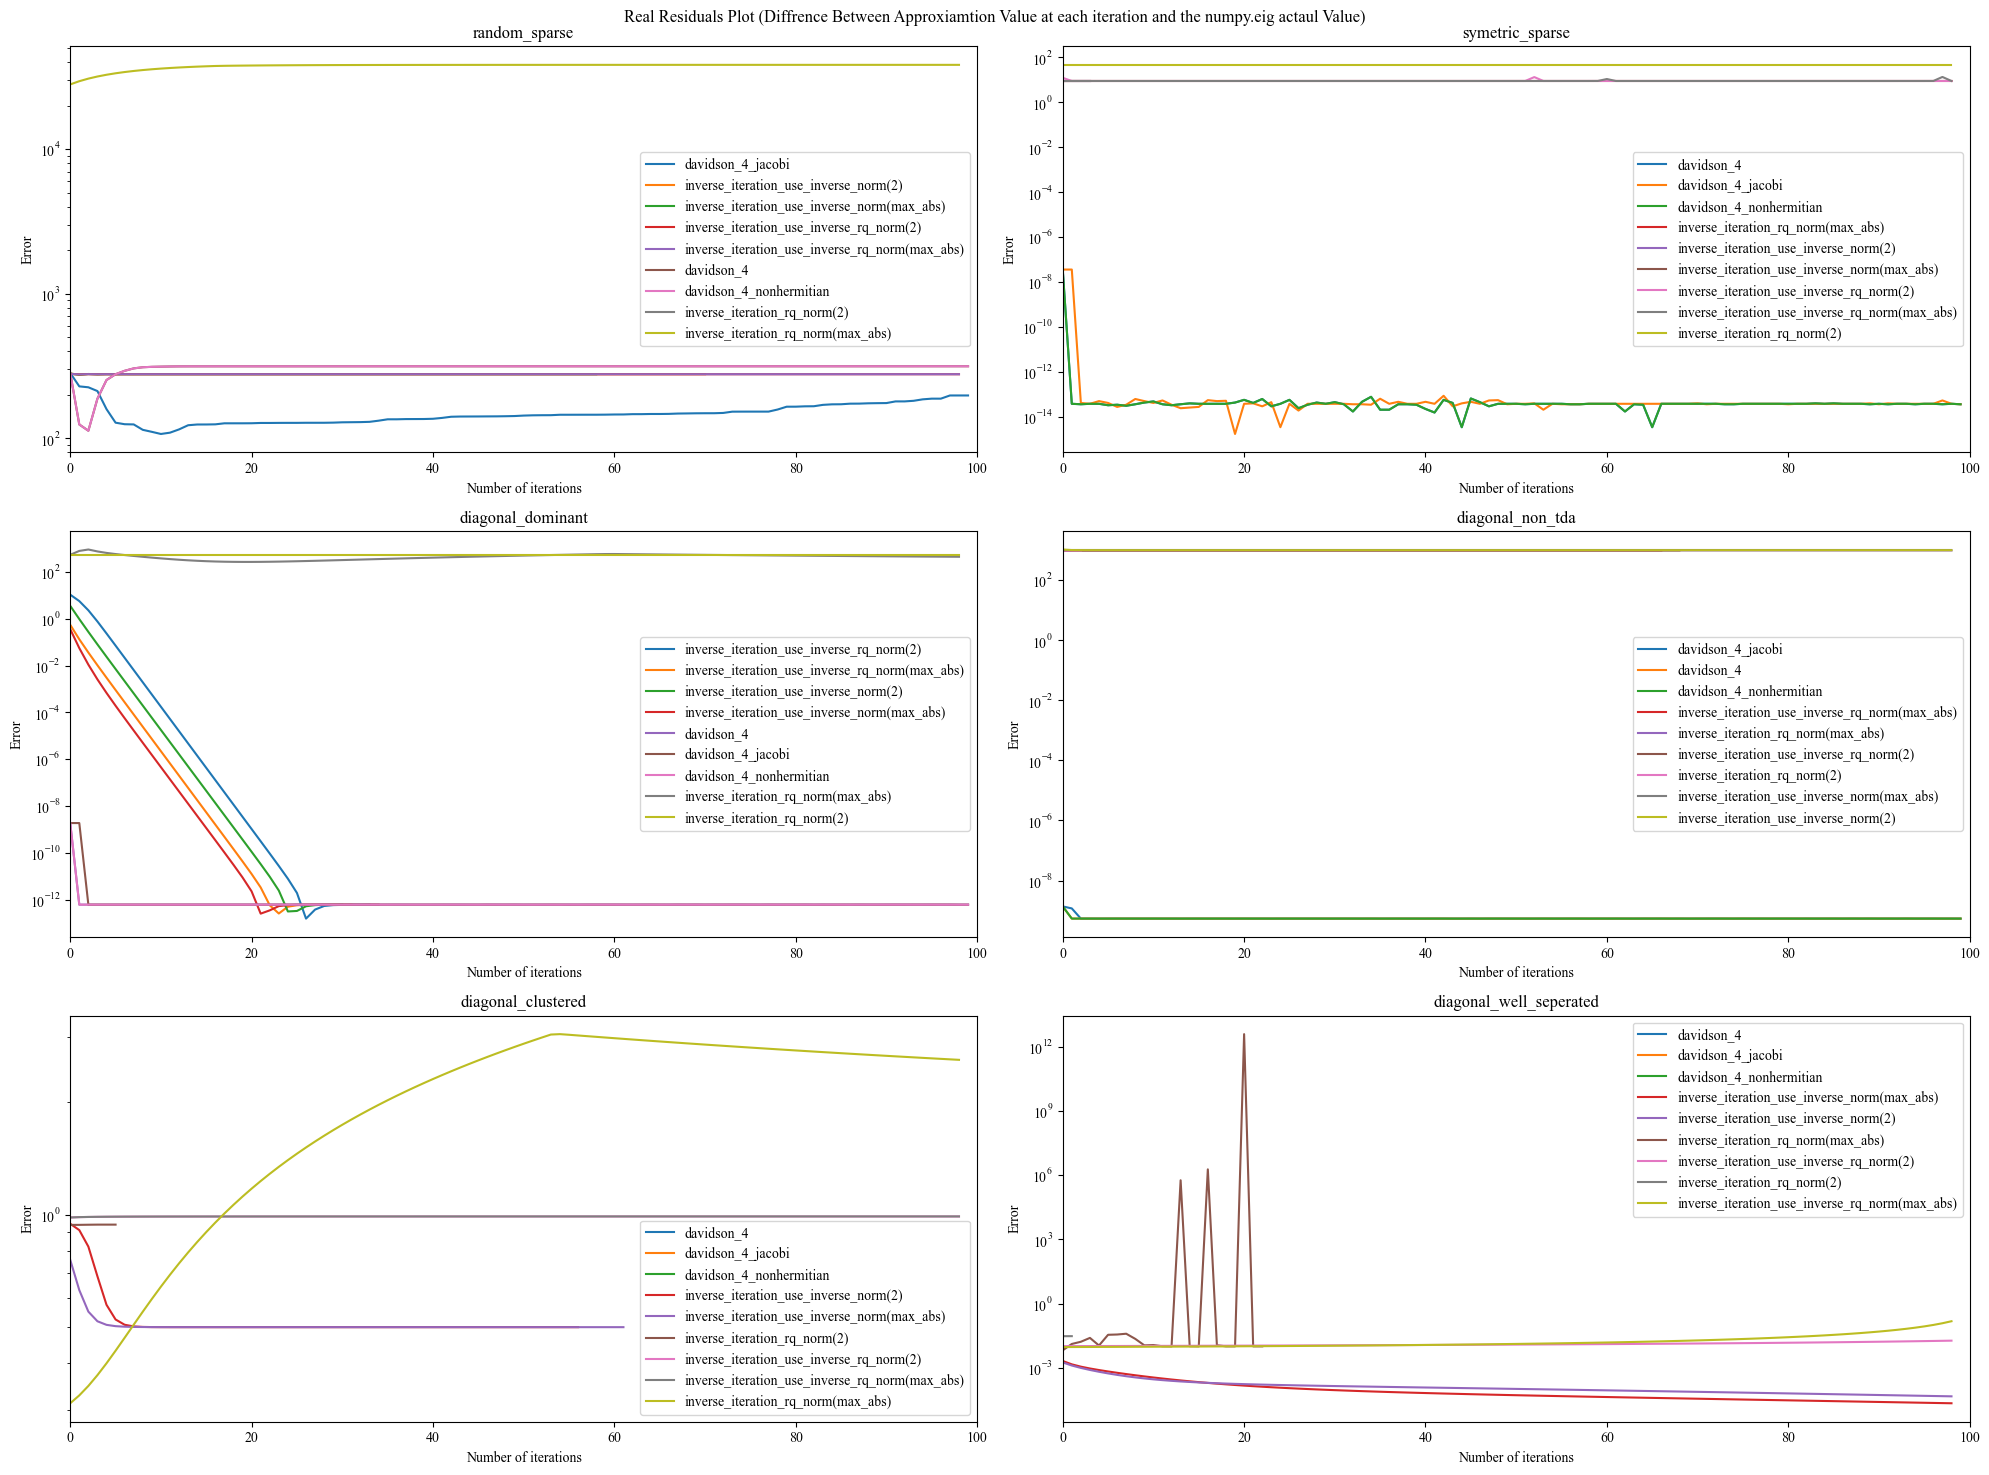

In [10]:
fig=plot_results(df_smallest_results,'real_diff')
fig.savefig('smallest_real_diff.svg')

C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_11004\3038973712.py:52: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[i,j].set_xlim(0,maxiter)


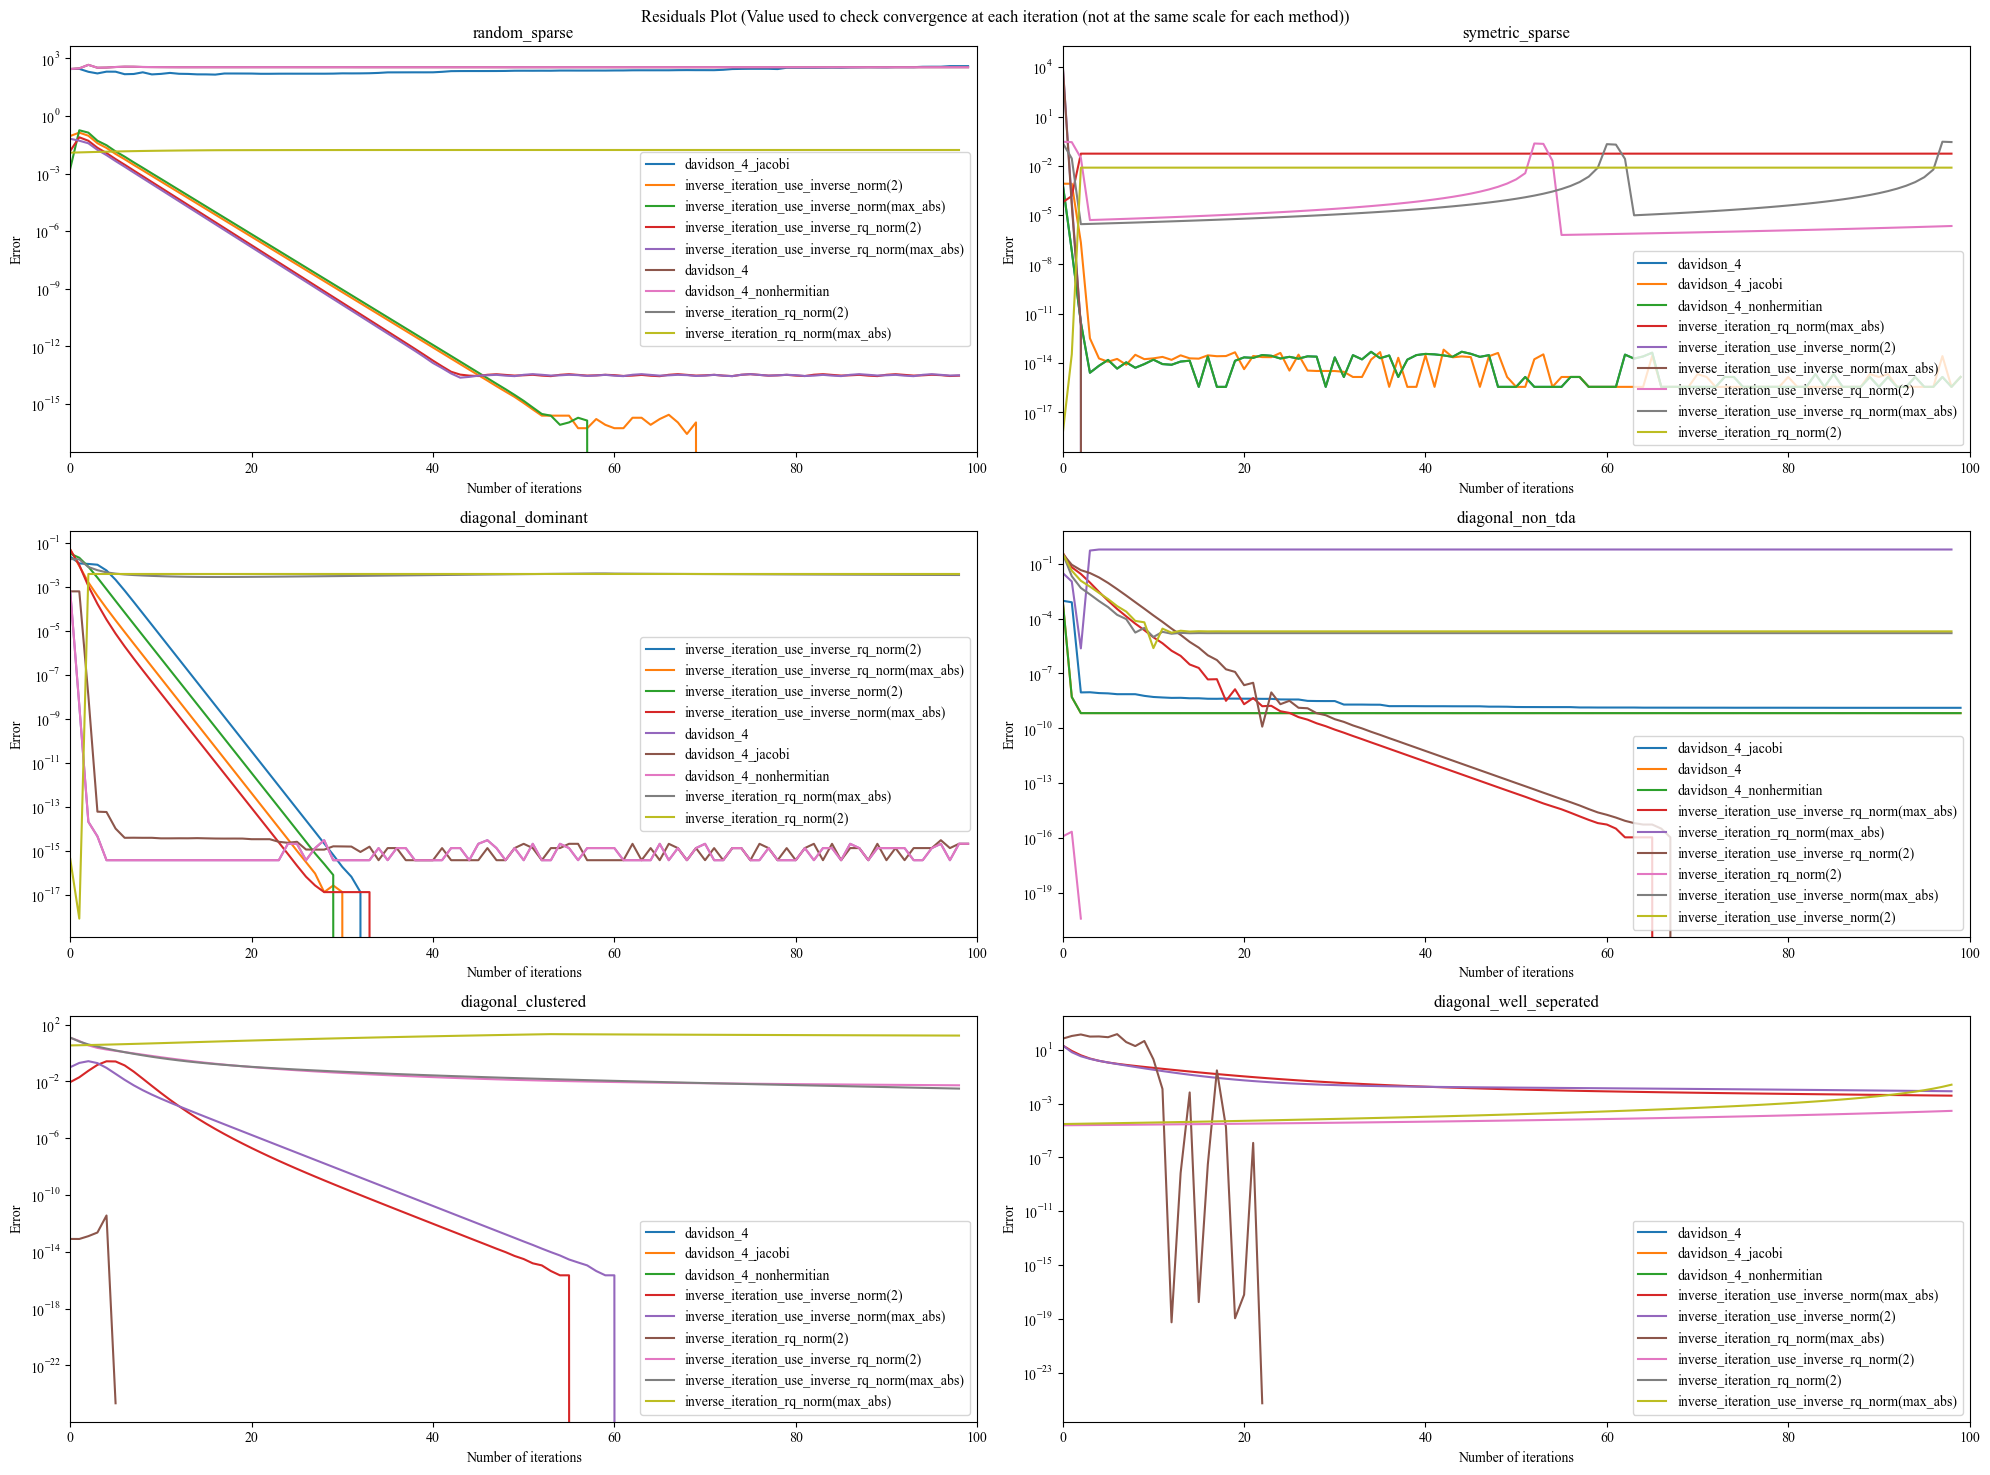

In [11]:
fig=plot_results(df_smallest_results,'residuals')
fig.savefig('smallest_residuals.svg')

In [12]:
# plot_results('approx_eigens')

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# import copy
# from random import randrange


# from seaborn import color_palette
# %matplotlib inline

# # for method_name,result in df_results.iterrows():
#     # plt.(result[0],label=method_name)
# plt.barh(y=df_results.index.values,width=df_results.iloc[:,3],color=[(randrange(255)/255.0, randrange(255)/255.0, randrange(255)/255.0) for i in range(len(df_results))])

# plt.xlabel('Error')
# plt.ylabel('Method')
# # plt.xticks()
# # plt.xlim(0,1)
# # plt.ylim(0.99978,.99999)
# plt.legend(loc='best',fontsize='6')

# Biggest EigenValue

## Defining Methods

In [14]:
k=1
biggest_methods_list={
    'numpy.eig':partial(methods.numpy_eigen,l=size-k,u=size),
    'power_method':partial(methods.power_iteration,maxiter=maxiter,tol=tol,output_approx_instead_of_residuals=True),
    # 'block power_method':partial(methods.block_power_method,maxiter=maxiter,tol=tol,k=k),
    'subspace_method_1':partial(methods.subspace_iteration_1,maxiter=maxiter,tol=tol,k=k),
    'subspace_method_2':partial(methods.subspace_iteration_2,maxiter=maxiter,tol=tol,k=k),
    # 'lancoz_1':partial(methods.lanczos_1,maxiter=maxiter),
    # 'lancoz_2':partial(methods.lanczos_2,maxiter=maxiter),
         }

## Running Methods

In [15]:
biggest_results={}
for matrix_name, matrix in matrices.items():
    matrix_results={} 
    for name, method in biggest_methods_list.items():
         eigen_value,eigen_vector,duration,iteration,residuals,approx_eigens=method(matrix)
         matrix_results[name]={'eigen_value':eigen_value, 'eigen_vector':eigen_vector,'duration':duration,'iteration':iteration, 'residuals':residuals,'approx_eigens':approx_eigens }
    biggest_results[matrix_name]=matrix_results


2024-01-30 05:20:04.556 | SUCCESS  | methods:numpy_eigen:758 - numpy = [4971.75877311+0.j]; time = 0.018980979919433594 seconds
2024-01-30 05:20:04.565 | INFO     | methods:power_iteration:408 - Power iteration converged at iteration number = 16
2024-01-30 05:20:04.567 | SUCCESS  | methods:power_iteration:418 - Power iteration: use_inverse = True, use_rayleigh = False, norm_c_mode = 2 = 4971.758773112147; time = 0.009001016616821289 seconds.
2024-01-30 05:20:04.626 | SUCCESS  | methods:subspace_iteration_1:183 - Subspace iteration = [4971.75877311]; time = 0.04001283645629883 seconds.
2024-01-30 05:20:04.700 | SUCCESS  | methods:subspace_iteration_2:216 - Subspace iteration_2 = [4971.75877311]; time = 0.07053756713867188 seconds.
2024-01-30 05:20:04.714 | SUCCESS  | methods:numpy_eigen:758 - numpy = [89.99991488]; time = 0.013003349304199219 seconds
2024-01-30 05:20:04.763 | SUCCESS  | methods:power_iteration:418 - Power iteration: use_inverse = True, use_rayleigh = False, norm_c_mode 

## Making Dataframes

In [20]:
df_biggest_results={}
for matrix_name, matrix_results in biggest_results.items():

    df_matrix_results=pd.DataFrame(matrix_results).T
    df_biggest_results[matrix_name]=df_matrix_results
    # df_matrix_results.loc[:,'eigen_value']=df_matrix_results.iloc[:,0].apply(lambda x:x.item() if type(x) is not float else x)
    df_matrix_results['approx_eigens']=df_matrix_results['approx_eigens'].apply(np.ravel)
    df_matrix_results['residuals']=abs(df_matrix_results['residuals'].apply(np.ravel))
    df_matrix_results['eigen_vector']=df_matrix_results['eigen_vector'].apply(np.ravel)
    df_matrix_results['residual_diff']=abs(df_matrix_results['eigen_value']-df_matrix_results['eigen_value'][0])
    df_matrix_results['real_diff']=abs(df_matrix_results['approx_eigens']-df_matrix_results['eigen_value'][0])
    # df_matrix_results=df_matrix_results.sort_values(by='residual_diff')
    df_biggest_results[matrix_name]=df_matrix_results


## Results

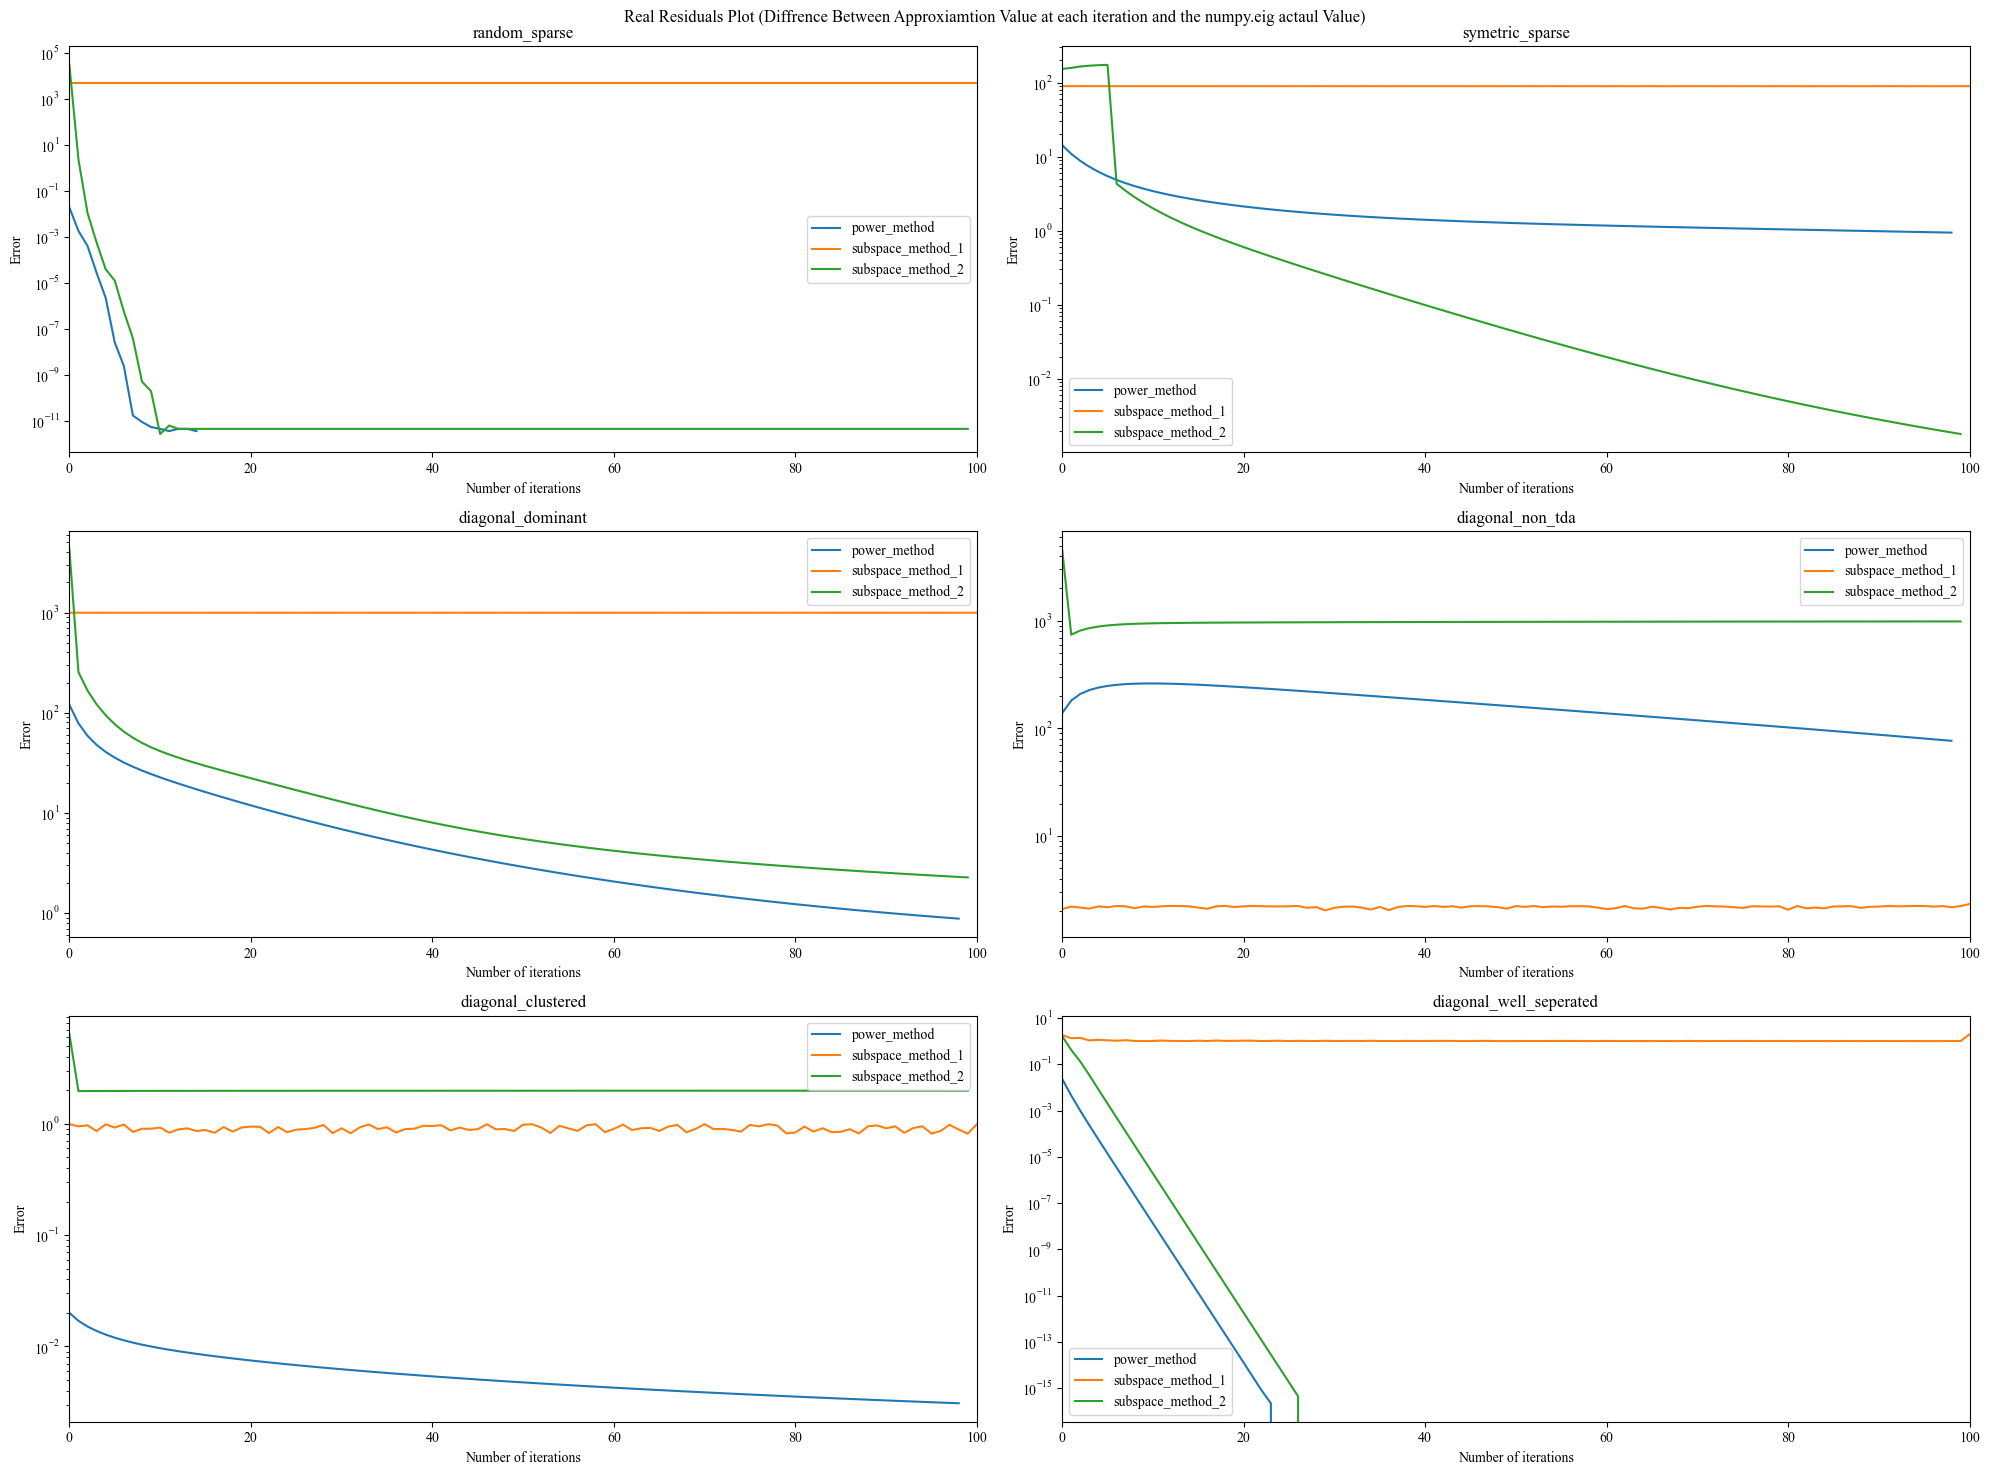

In [22]:
fig=plot_results(df_biggest_results,'real_diff')
fig.savefig('biggest_real_diff.svg')

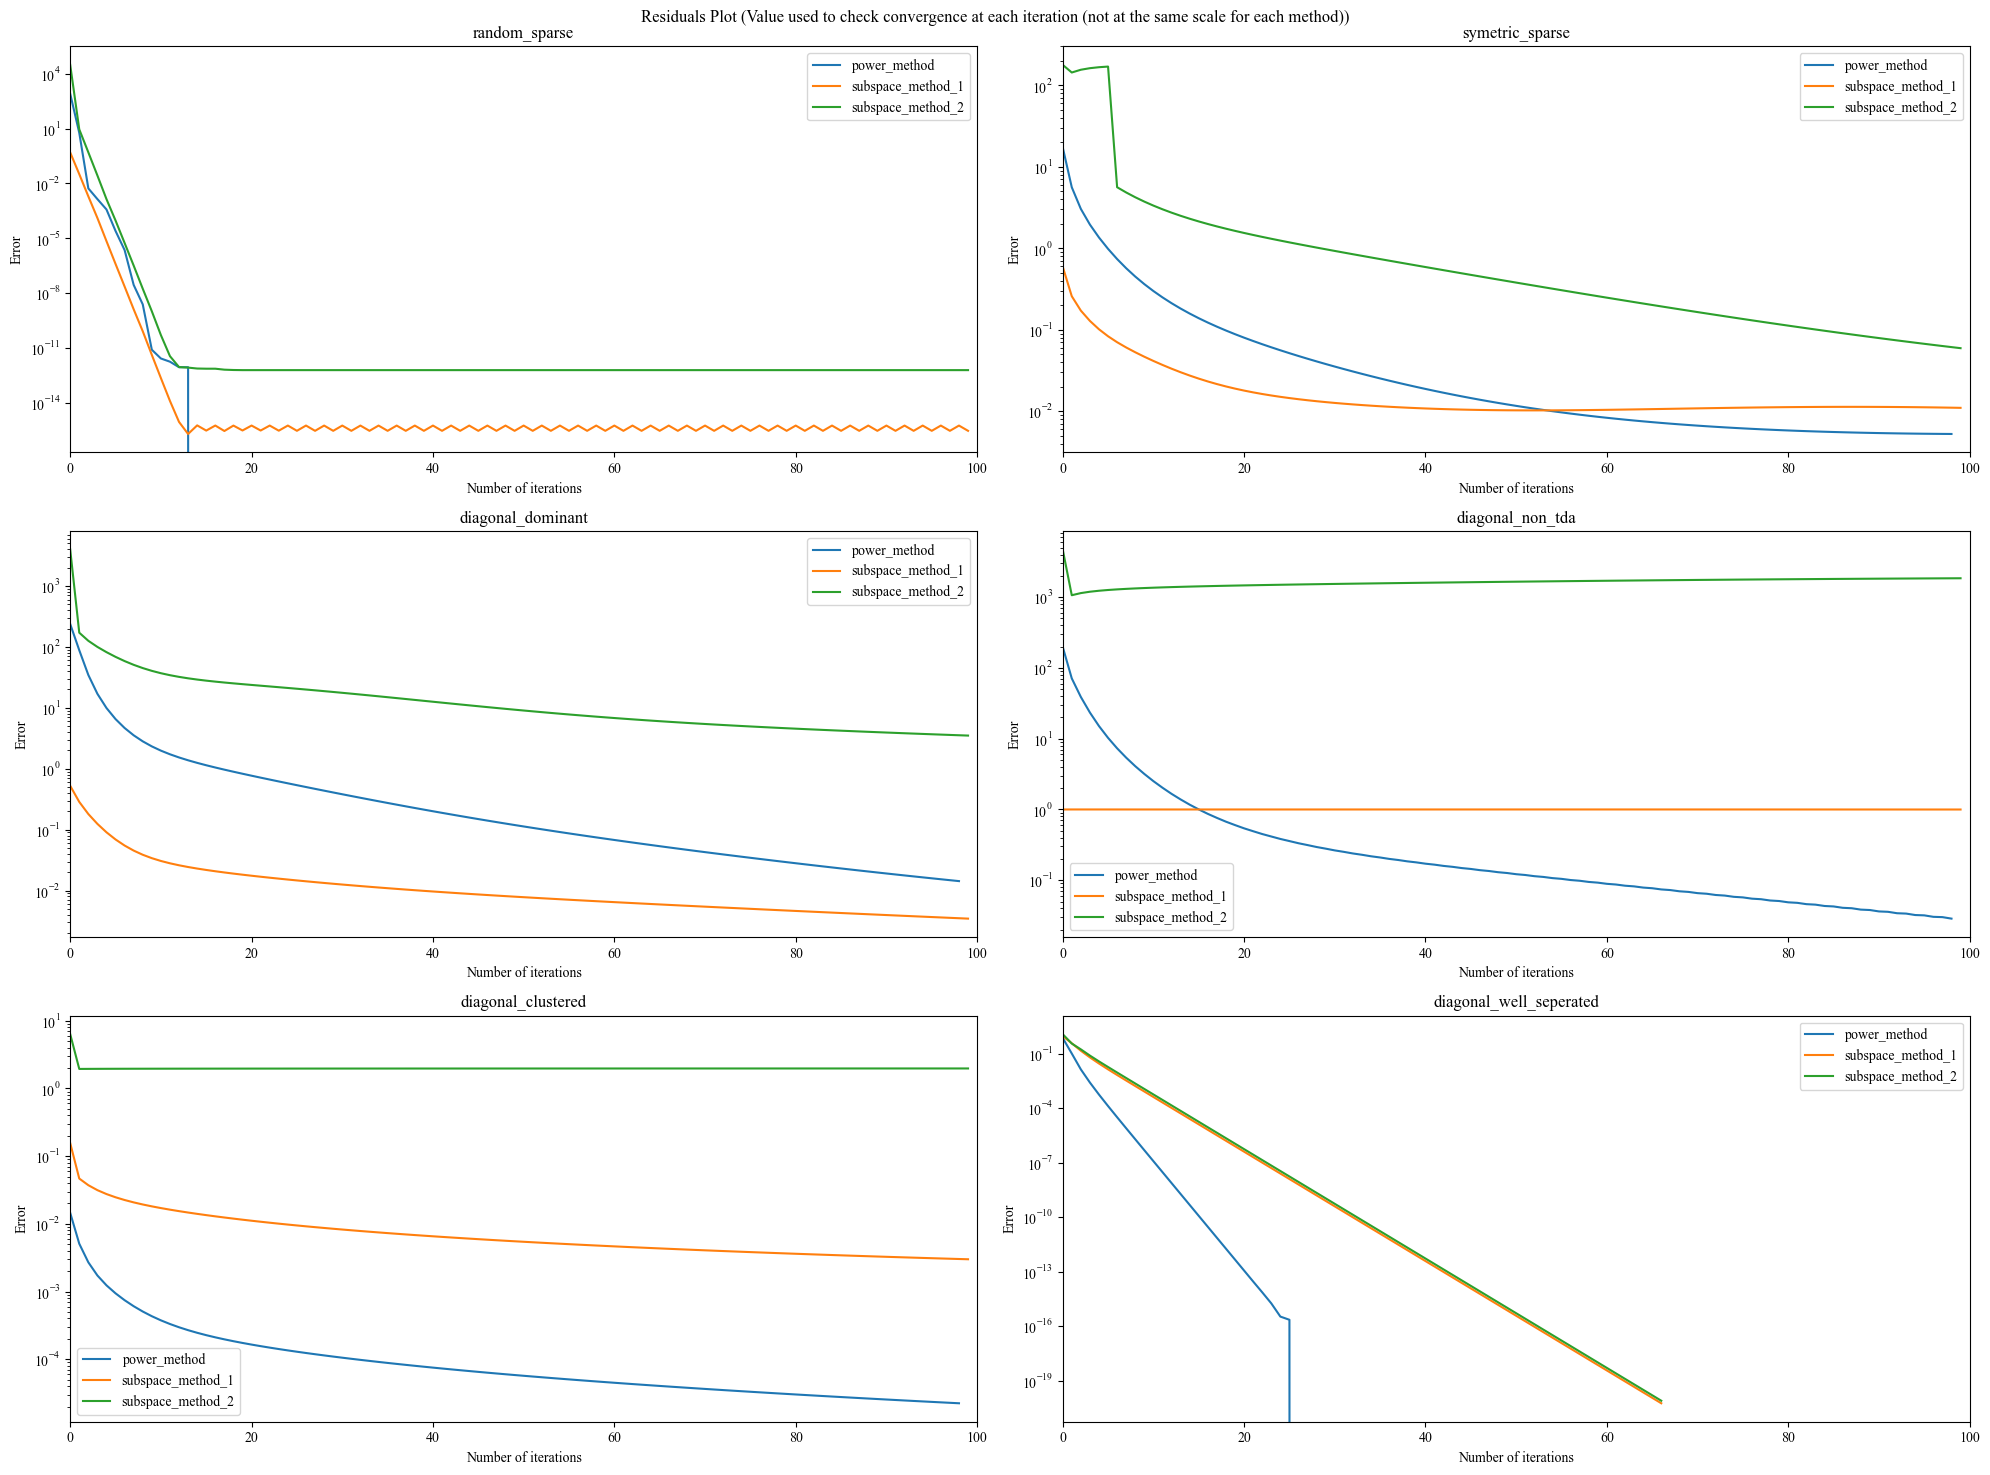

In [23]:
fig=plot_results(df_biggest_results,'residuals')
fig.savefig('biggest_residuals.svg')